In [1]:
import sys

sys.path.append('./source/')

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import integrate, stats
import matplotlib.cm as cm
from numpy import fft
from scipy import interpolate as intp
import importlib


from source import plots
from source import prob_dists as pd
from utils import read_param_file, update_params


from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [3]:
param_file = './source/n-1.params'
params = read_param_file(param_file)
p = params
p

{'R_G': 220,
 'd_solar': 8.5,
 'psi': 40,
 'M_min': 0.01,
 'M_max': 10000000000.0,
 'fwimp': 1.0,
 'mean_params': {'a': 77.4, 'b': 0.56, 'c': -0.19},
 'nside': 128,
 'area_fermi': 6000.0,
 'n': -1,
 'log_flux_min': -13,
 'log_flux_max': -4,
 'N': 5000,
 'log_k_min': 0,
 'log_k_max': 5,
 'N_k': 250000,
 'psh_log_f_min': -3,
 'psh_log_f_max': -2,
 'N_psh': 500,
 'omega_pixel': 6.391586616190171e-05,
 'exposure': 5600.0}

In [4]:
p = update_params(param_file, p, 'exposure', 1 * 14000 * 0.2/0.5)

In [4]:
with np.load('./output/n-1_pshfunc.npz') as f:
    psi = f['psi']
    fluxes = f['flux']
    psh2d = f['psh']

In [5]:
pshfunc2d = intp.interp2d(psi, fluxes, np.nan_to_num(psh2d), bounds_error=False, fill_value=0)
fluxes = fluxes[20:-55]
np.log10(fluxes[-1])

-2.2208835341365463

0.0013062415315807255
0.0003446061453300707
6.104782706161911e-07
-5.687361041587916e-09
-6.042744321202541e-09
-6.282814727782615e-09
-6.485047779088431e-09
-6.657291247421329e-09
-6.79923253076711e-09
-6.9153461434298e-09
-7.015137505592715e-09
-7.100222619971921e-09
-7.169176079964476e-09
-7.2253878187826575e-09
-7.271288586405784e-09
-7.307308099736501e-09
-7.3333612169740915e-09
-7.354490284948478e-09
-7.3680821107739935e-09
-7.371652216201044e-09


[Text(1, 0, '40.0'),
 Text(1, 0, '50.0'),
 Text(1, 0, '60.0'),
 Text(1, 0, '70.0'),
 Text(1, 0, '80.0'),
 Text(1, 0, '90.0'),
 Text(1, 0, '100.0'),
 Text(1, 0, '110.0'),
 Text(1, 0, '120.0'),
 Text(1, 0, '130.0'),
 Text(1, 0, '140.0'),
 Text(1, 0, '150.0'),
 Text(1, 0, '160.0'),
 Text(1, 0, '170.0'),
 Text(1, 0, '180.0')]

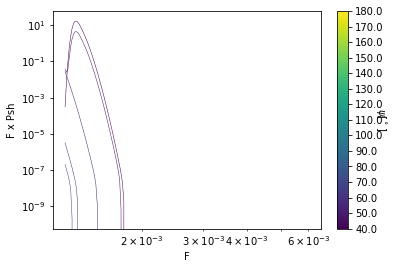

In [6]:
numnum = 20
psis = np.linspace(40, 180, num=numnum)
colors = cm.viridis(np.linspace(0, 1, num=numnum))

fig, ax = plt.subplots()

psh_vals_over_psi = []
fxs = fluxes
for psi, col in zip(psis, colors):
    ax.plot(fxs, fxs * pshfunc2d(psi, fxs).flatten(), label=rf"{psi}$^\circ$", color=col, lw=0.5)
    print(np.trapz(fxs * pshfunc2d(psi, fxs).flatten(), fxs))
   
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('F')
ax.set_ylabel('F x Psh')
cbarlabs = np.arange(min(psis), max(psis)+1, step=10)
cbar = fig.colorbar(cm.ScalarMappable(cmap=cm.viridis), ticks=np.linspace(0, 1, num=len(cbarlabs)))
cbar.set_label(r'$\psi$[$^\circ$]', rotation=270)
cbar.ax.set_yticklabels(cbarlabs)

In [7]:
pshfunc2d(psis, fluxes).shape, psis.shape, fluxes.shape

((175, 20), (20,), (175,))

In [42]:
for psi in psis:
    minn = pshfunc2d(psi, fluxes).argmin()
    print(psi, pshfunc2d(psi, fluxes)[minn])

40.0 [0.]
47.368421052631575 [0.]
54.73684210526316 [0.]
62.10526315789474 [-1.88965534e-07]
69.47368421052632 [-8.50344904e-07]
76.84210526315789 [3.41750208e-05]
84.21052631578948 [0.00205905]
91.57894736842105 [0.03003362]
98.94736842105263 [0.14769253]
106.3157894736842 [0.21650467]
113.68421052631578 [0.18463819]
121.05263157894737 [0.16058545]
128.42105263157896 [0.1421443]
135.78947368421052 [0.12528813]
143.1578947368421 [0.11196106]
150.5263157894737 [0.10364911]
157.89473684210526 [0.10685565]
165.26315789473682 [0.11487367]
172.6315789473684 [0.12311445]
180.0 [0.12829194]


In [10]:
counts = np.arange(0, 20)
exposure = 1 * 14000 * 0.2/0.5
psi = 40

In [9]:
from scipy.stats import poisson
print(poisson.pmf(counts[:, np.newaxis], exposure * fluxes).shape, pshfunc2d(40, fluxes).flatten().shape)

pcvals = np.trapz(pshfunc2d(psi, fluxes).flatten() * poisson.pmf(counts[:, np.newaxis], exposure * fluxes), fluxes, axis=-1)
# func = pshfunc2d(40, fluxes).flatten() * poisson.pmf(2, exposure * fluxes)
pcvals

(20, 195) (195,)


array([9.02205235e-01, 8.30880381e-02, 9.19468437e-03, 2.34458514e-03,
       1.03947659e-03, 5.74242838e-04, 3.45789201e-04, 2.13448904e-04,
       1.30500824e-04, 7.74383053e-05, 4.40763354e-05, 2.39086045e-05,
       1.23205500e-05, 6.02481788e-06, 2.79602611e-06, 1.23249305e-06,
       5.16675059e-07, 2.06291374e-07, 7.85707020e-08, 2.85926260e-08])

In [17]:
print(exposure*np.trapz(fluxes * pshfunc2d(40, fluxes).flatten(), fluxes))
pp = poisson.pmf(counts, exposure*np.trapz(fluxes * pshfunc2d(40, fluxes).flatten(), fluxes))

0.1218517051804078


Text(0, 0.5, 'P(C) for 40 deg, n=0')

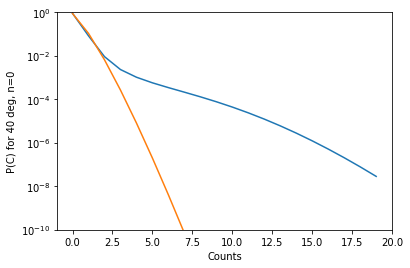

In [18]:
plt.plot(counts, pcvals)
plt.plot(counts, pp)
ax = plt.gca()

ax.set_yscale('log')
ax.set_ylim(top=1, bottom=1e-10)
ax.set_xlim(right=20)
ax.set_xlabel('Counts')
ax.set_ylabel('P(C) for 40 deg, n=0')

In [10]:
import healpy

In [11]:
nside = p['nside']
npix = healpy.nside2npix(nside)
pixel_counts = np.ones(npix) * healpy.pixelfunc.UNSEEN
print(npix)

196608


In [21]:
lon, lat = healpy.pix2ang(nside, range(npix), lonlat=True)
ang_dists = np.rad2deg(np.arccos(np.cos(np.deg2rad(lon)) * np.cos(np.deg2rad(lat))))
ang_dists, lon, lat

(array([89.74156502, 90.25843498, 90.25843498, ..., 90.25843498,
        90.25843498, 89.74156502]),
 array([ 45., 135., 225., ..., 135., 225., 315.]),
 array([ 89.6345165,  89.6345165,  89.6345165, ..., -89.6345165,
        -89.6345165, -89.6345165]))

In [22]:
lon, lat, max(ang_dists), min(ang_dists)

(array([ 45., 135., 225., ..., 135., 225., 315.]),
 array([ 89.6345165,  89.6345165,  89.6345165, ..., -89.6345165,
        -89.6345165, -89.6345165]),
 179.70158313251247,
 0.2984168674875423)

In [23]:
print(healpy.nside2pixarea(128, degrees=True))

0.2098234113027917


In [24]:
psis = np.linspace(40, 180, num=50)
pc_psi = np.array([np.trapz(pshfunc2d(abs(psi), fluxes).flatten() * poisson.pmf(counts[:, np.newaxis], exposure * fluxes), fluxes, axis=-1) for psi in psis])
pc_of_psi = intp.interp1d(psis, pc_psi, axis=0)

In [25]:
good_indices = (abs(lat) >= 40)
subsample = ang_dists[good_indices]
print(len(subsample))
sub_counts = np.zeros(len(subsample))
for i, psi in enumerate(subsample):
    if i % 10000 == 0:
        print(i, '/', len(subsample))
#     print(psi)
    pcvals = pc_of_psi(abs(psi))
    sub_counts[i] = np.random.choice(np.arange(len(pcvals)), size=1, p=pcvals/np.sum(pcvals))
    
pixel_counts[good_indices] = sub_counts
pixel_counts_pc = pixel_counts[:]

70144
0 / 70144
10000 / 70144
20000 / 70144
30000 / 70144
40000 / 70144
50000 / 70144
60000 / 70144
70000 / 70144


In [26]:
np.sum(pixel_counts > 0)

3165

0.8392936452111668


(0.05584226733576642, 3917.0)

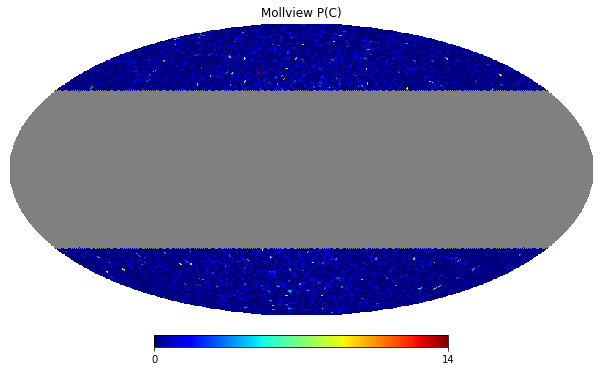

In [27]:
nreduce = 64
healpy.mollview(healpy.pixelfunc.ud_grade(healpy.pixelfunc.ma(pixel_counts_pc), nreduce, pess=True, power=-2), cmap=cm.jet, title="Mollview P(C)")
print(healpy.nside2pixarea(nreduce, degrees=True))
np.mean(pixel_counts_pc[good_indices]), np.sum(pixel_counts_pc[good_indices])

In [28]:
lsub = len(subsample)
pixel_counts_poisson = np.ones(npix) * healpy.pixelfunc.UNSEEN
sub_counts = np.zeros(lsub)
for i, psi in enumerate(subsample):
    if i % 100000 == 0:
        print(i, '/', lsub)
#     print(psi)
    sub_counts[i] = stats.poisson.rvs(exposure*np.trapz(fluxes * pshfunc2d(psi, fluxes).flatten(), fluxes))
    if sub_counts[i] > 5: 
        print(sub_counts[i])
    
pixel_counts_poisson[good_indices] = sub_counts


0 / 70144


(0.05638401003649635, 3955.0)

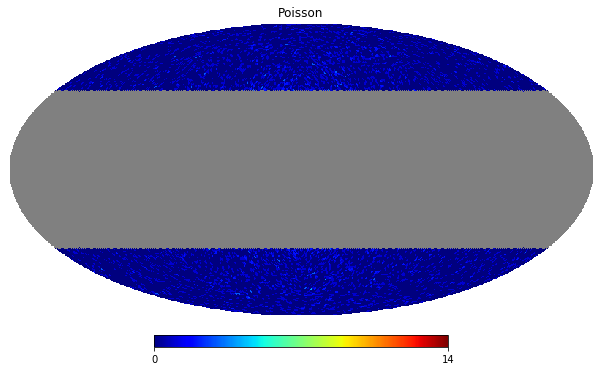

In [29]:
healpy.mollview(healpy.pixelfunc.ud_grade(healpy.pixelfunc.ma(pixel_counts_poisson), nreduce, pess=True, power=-2), cmap=cm.jet, title="Poisson", max=14)
np.mean(pixel_counts_poisson[good_indices]), np.sum(pixel_counts_poisson[good_indices])

In [64]:
with np.load('./output/n0_pshfunc.npz') as f:
    psi = f['psi']
    fluxes = f['flux']
    psh2d = f['psh']

# restrict to valid range of flux calculation
valid_lim = -55
fluxes = fluxes[:valid_lim]
psh2d = psh2d[:valid_lim]

# generate data with different fwimp
f = 1000

# get psh data as function of psi and flux
counts = np.arange(0, 20)
psh2d[psh2d < 0] = 0
pshfunc2d = intp.interp2d(psi, f * fluxes, np.nan_to_num(psh2d), bounds_error=False, fill_value=0)

# make the simulated skymap
psis = np.linspace(40, 180, num=50)
pc_psi = np.array([1/f * np.trapz(pshfunc2d(abs(psi), fluxes).flatten() * stats.poisson.pmf(counts[:, np.newaxis], p['exposure'] * fluxes), fluxes, axis=-1) for psi in psis])
pc_of_psi = intp.interp1d(psis, pc_psi, axis=0)

subcounts, ang_dists = pd.generate_skymap_sample_pc(p, pc_of_psi, return_subcounts=True, save_output=True)

# get psh for the angles we are considering 
psh = pshfunc2d(np.abs(ang_dists), fluxes)
psh /= np.trapz(psh, fluxes, axis=0)
print(ang_dists.shape)

saved in ./output/n0_skymap_32862.npy
(70144,)


In [66]:
importlib.reload(pd)
import time
start_time = time.time()
num_search = 40
fwimp_search = (np.log10(999), np.log10(1001), num_search)
S, fwimps = pd.likelihood(p, psh, subcounts.astype(np.int16), fluxes, counts, fwimp_limits=fwimp_search)

print('time per eval', (time.time() - start_time)/num_search)

[ 999.          999.0512321   999.10246683  999.15370418  999.20494416
  999.25618677  999.30743201  999.35867988  999.40993037  999.4611835
  999.51243925  999.56369763  999.61495863  999.66622227  999.71748854
  999.76875743  999.82002896  999.87130311  999.92257989  999.97385931
 1000.02514135 1000.07642602 1000.12771333 1000.17900326 1000.23029582
 1000.28159102 1000.33288884 1000.38418929 1000.43549238 1000.4867981
 1000.53810645 1000.58941742 1000.64073103 1000.69204728 1000.74336615
 1000.79468766 1000.84601179 1000.89733856 1000.94866797 1001.        ]
0 / 40


/Users/runburg/github/dm_gal_substructure/source/prob_dists.py:367: RuntimeWarning: divide by zero encountered in log
  S[i] = -2 * np.sum(np.log(pixel_probs))


1 / 40
2 / 40
3 / 40
4 / 40
5 / 40
6 / 40
7 / 40
8 / 40
9 / 40
10 / 40
11 / 40
12 / 40
13 / 40
14 / 40
15 / 40
16 / 40
17 / 40
18 / 40
19 / 40
20 / 40
21 / 40
22 / 40
23 / 40
24 / 40
25 / 40
26 / 40
27 / 40
28 / 40
29 / 40
30 / 40
31 / 40
32 / 40
33 / 40
34 / 40
35 / 40
36 / 40
37 / 40
38 / 40
39 / 40
time per eval 7.0870691478252414


<ipython-input-67-365b7dbc2124>:2: RuntimeWarning: invalid value encountered in subtract
  axs.plot(fwimps, np.exp(-0.5*(S - S.min())), color='xkcd:tangerine', label='P(C)')


999.0000000000001 inf


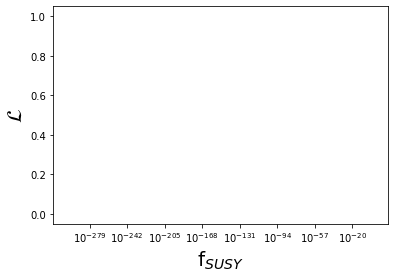

In [67]:
fig, axs = plt.subplots()
axs.plot(fwimps, np.exp(-0.5*(S - S.min())), color='xkcd:tangerine', label='P(C)')
axs.set_xlabel(r'f$_{SUSY}$', fontsize=20)
axs.set_xscale('log')
axs.set_ylabel(r'$\mathcal{L}$', fontsize=20)
print(fwimps[S.argmin()], S.min())

In [69]:
importlib.reload(pd)
Spoi, fwimpspoi = pd.poisson_likelihood(p, psh, subcounts.astype(np.int16), fluxes, counts, fwimp_limits=fwimp_search)

[ 999.          999.0512321   999.10246683  999.15370418  999.20494416
  999.25618677  999.30743201  999.35867988  999.40993037  999.4611835
  999.51243925  999.56369763  999.61495863  999.66622227  999.71748854
  999.76875743  999.82002896  999.87130311  999.92257989  999.97385931
 1000.02514135 1000.07642602 1000.12771333 1000.17900326 1000.23029582
 1000.28159102 1000.33288884 1000.38418929 1000.43549238 1000.4867981
 1000.53810645 1000.58941742 1000.64073103 1000.69204728 1000.74336615
 1000.79468766 1000.84601179 1000.89733856 1000.94866797 1001.        ]
0 / 40


/Users/runburg/github/dm_gal_substructure/source/prob_dists.py:389: RuntimeWarning: divide by zero encountered in log
  S[i] = -2 * np.sum(np.log(pixel_probs))


1 / 40
2 / 40
3 / 40
4 / 40
5 / 40
6 / 40
7 / 40
8 / 40
9 / 40
10 / 40
11 / 40
12 / 40
13 / 40
14 / 40
15 / 40
16 / 40
17 / 40
18 / 40
19 / 40
20 / 40
21 / 40
22 / 40
23 / 40
24 / 40
25 / 40
26 / 40
27 / 40
28 / 40
29 / 40
30 / 40
31 / 40
32 / 40
33 / 40
34 / 40
35 / 40
36 / 40
37 / 40
38 / 40
39 / 40


P(C) min of -2 ln L: 30286.117255678328
Poisson min of -2 ln L: 33211.17065640717


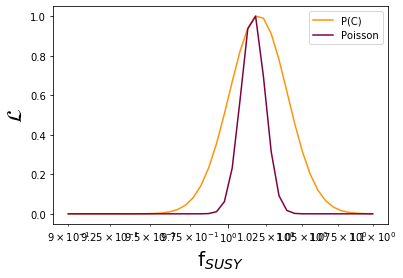

In [59]:
axs.plot(fwimpspoi, np.exp(-0.5*(Spoi-Spoi.min())), color='xkcd:wine', label='Poisson')
axs.legend()
axs.set_yscale('linear')
print('P(C) min of -2 ln L:', S.min())
print('Poisson min of -2 ln L:', Spoi.min())
fig

In [62]:
print(fwimps[Spoi.argmin()], Spoi.min())
print(np.log10(np.e)*1500)

1.0182944735915616 33211.17065640717
651.4417228548778


In [75]:
from astropy.io import fits
bg = fits.open('output/background.fits')

In [79]:
bg[0].header

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                  -32 / array data type                                
NAXIS   =                    3 / number of array dimensions                     
NAXIS1  =                 2880                                                  
NAXIS2  =                 1441                                                  
NAXIS3  =                   28                                                  
EXTEND  =                    T                                                  
CRVAL1  =                    0                                                  
CDELT1  =               -0.125                                                  
CRPIX1  =               1440.5                                                  
CTYPE1  = 'GLON-CAR'                                                            
CUNIT1  = 'deg     '                                                            
CRVAL2  =                   

In [ ]:
a = np.reshape(np.arange(9), (3, 3))
print(a)
a[np.array([[1, 0], [1, 2] , [2, 1]])]

In [21]:
import scipy.stats as st

class my_pdf(st.rv_continuous):
    def _pdf(self, x):
        return custom_pdf(x)
    
    def _cdf(self, x):
        return custom_cdf(x)
    
    def _ppf(self, x):
        return custom_ppf(x)

In [22]:
psi = 50
custom_pdf = lambda x: pshfunc2d(psi, x).flatten()

norm = np.trapz(pshfunc2d(psi, fluxes).flatten(), fluxes)
discrete_cdf = integrate.cumtrapz(pshfunc2d(psi, fluxes).flatten(), fluxes, initial=0)
custom_cdf = intp.interp1d(fluxes, discrete_cdf, fill_value=0, bounds_error=False)

custom_ppf = intp.interp1d(discrete_cdf, fluxes, fill_value=0, bounds_error=False)

func50 = my_pdf(a=fluxes.min(), b=fluxes.max(), name='my_pdf')

In [23]:
# pcvals = np.trapz(pshfunc2d(psi, fluxes).flatten() * poisson.pmf(counts[:, np.newaxis], exposure * fluxes), fluxes, axis=-1)

def pc(psi, counts_max=15):
    counts = np.arange(0, counts_max + 1)
    
    pcvals = np.trapz(pshfunc2d(psi, fluxes).flatten() * poisson.pmf(counts[:, np.newaxis], exposure * fluxes), fluxes, axis=-1)
    custom_pdf = intp.interp1d(counts, pcvals, fill_value=0, bounds_error=False)
    
    discrete_cdf = integrate.cumtrapz(pcvals, counts, initial=0)
    custom_cdf = intp.interp1d(counts, discrete_cdf, fill_value=0, bounds_error=False)

    custom_ppf = intp.interp1d(discrete_cdf, counts, fill_value=0, bounds_error=False)
    
    return my_pdf(a=fluxes.min(), b=fluxes.max(), name='my_pdf')

In [24]:
pc(50).rvs(size=10)

array([0.00000000e+00, 9.18021899e-06, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 2.02167822e-05, 0.00000000e+00, 1.03236482e-05,
       0.00000000e+00, 1.62894922e-05])

1.0000000000000002


Text(0, 0.5, 'P(C) for 40 deg, n=0')

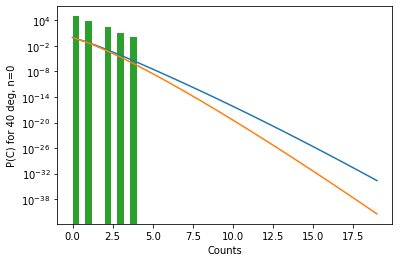

In [25]:
psi = 40
pcvals = np.trapz(pshfunc2d(psi, fluxes).flatten() * poisson.pmf(counts[:, np.newaxis], exposure * fluxes), fluxes, axis=-1)
pp = poisson.pmf(counts, exposure*fluxes[np.argmax(pshfunc2d(psi, fluxes))])

print(np.sum(pcvals/np.sum(pcvals)))
plt.plot(counts, pcvals)
plt.plot(counts, pp)
plt.hist(np.random.choice(np.arange(len(pcvals)), size=100000, p=pcvals/np.sum(pcvals)))

ax = plt.gca()
ax.set_yscale('log')
# ax.set_ylim(top=1, bottom=1e-20)
ax.set_xlabel('Counts')
# ax.set_xscale('log')
ax.set_ylabel('P(C) for 40 deg, n=0')

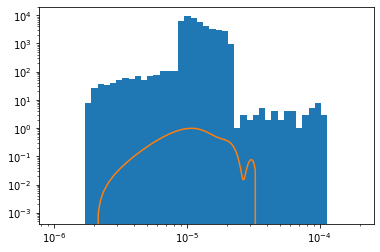

In [26]:
fig, ax = plt.subplots()
bins = np.logspace(np.log10(fluxes.min()), np.log10(fluxes.max()), num=50)
ax.hist(func50.rvs(size=100000), bins=bins)
ax.plot(fxs, fxs * pshfunc2d(psi, fxs).flatten(), label=rf"{psi}$^\circ$")
ax.set_xscale('log')
ax.set_yscale('log')

In [27]:
for i, latt in enumerate(lat):
    if latt < 40:
        pixel_counts[i] = 0
    else:
        

SyntaxError: unexpected EOF while parsing (<ipython-input-27-3e4a41aa4645>, line 5)